<a target="_blank" href="https://colab.research.google.com/github/Melon-Quest/CloudMask/blob/main/notebooks/metrics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Dataset

@article{aybar2022cloudsen12,
  title={CloudSEN12-a global dataset for semantic understanding of cloud and cloud shadow in Sentinel-2},
  author={Aybar, Cesar and Ysuhuaylas, Luis and Loja, Jhomira and Gonzales, Karen and Herrera, Fernando and Yali, Roy and Flores, Angie and Diaz, Lissette and Cuenca, Nicole and Espinoza, Wendy and Prudencio, Fernando and Llactayo, Valeria and Montero, David and Sudmanns, Martin and Tiede, Dirk and Mateo-García, Gonzalo and Gómez-Chova, Luis},
  year={2022},
  publisher={EarthArXiv}
}

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio mlstac s2cloudless

# **Streaming read support**



In [ ]:
import mlstac

### **1. Load the dataset**

In [ ]:
s2_id_gee = "20190616T165901_20190616T171622_T14RNP"


In [ ]:
ds = mlstac.load(snippet="isp-uv-es/CloudSEN12Plus")

### **2. Filter dataset**

In [ ]:
ds = ds.metadata[(ds.metadata["split"] == "train") & (ds.metadata["label_type"] == "high") & (ds.metadata["proj_shape"] == 509)]
ds

,datapoint_id,begin,length,roi_id,equi_id,equi_zone,s2_id_gee,s2_id,s2_date,s2_mean_solar_azimuth_angle,...,label_type,fixed,split,url,metadata_length,thick_percentage,thin_percentage,cloud_shadow_percentage,clear_percentage,state
0,ROI_0002__20190116T142751_20190116T143701_T19GDN,0,3114584,ROI_0002,SA5120_E1260N0461,SA,20190116T142751_20190116T143701_T19GDN,S2A_MSIL1C_20190116T142751_N0207_R053_T19GDN_2...,2019-01-16T14:44:40Z,59.177164,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,86,0,12,2,remote
1,ROI_0002__20190602T142041_20190602T142839_T19GDN,3114584,2491092,ROI_0002,SA5120_E1260N0461,SA,20190602T142041_20190602T142839_T19GDN,S2A_MSIL1C_20190602T142041_N0207_R010_T19GDN_2...,2019-06-02T14:34:51Z,29.664897,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,0,0,0,100,remote
2,ROI_0002__20200217T141651_20200217T142551_T19GDN,5605676,2752599,ROI_0002,SA5120_E1260N0461,SA,20200217T141651_20200217T142551_T19GDN,S2A_MSIL1C_20200217T141651_N0209_R010_T19GDN_2...,2020-02-17T14:34:42Z,54.261006,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,31,0,14,55,remote
3,ROI_0002__20200410T142731_20200410T143742_T19GDN,8358275,2336528,ROI_0002,SA5120_E1260N0461,SA,20200410T142731_20200410T143742_T19GDN,S2A_MSIL1C_20200410T142731_N0209_R053_T19GDN_2...,2020-04-10T14:44:42Z,34.251647,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,0,35,13,52,remote
4,ROI_0002__20200422T141729_20200422T142243_T19GDN,10694803,2463967,ROI_0002,SA5120_E1260N0461,SA,20200422T141729_20200422T142243_T19GDN,S2B_MSIL1C_20200422T141729_N0209_R010_T19GDN_2...,2020-04-22T14:34:43Z,34.092724,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,0,6,0,94,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,ROI_9992__20190422T060641_20190422T061156_T42SWC,23606019400,2942466,ROI_9992,AS5120_E0405N0723,AS,20190422T060641_20190422T061156_T42SWC,S2A_MSIL1C_20190422T060641_N0207_R134_T42SWC_2...,2019-04-22T06:19:48Z,144.064342,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,10,0,5,85,remote
8486,ROI_9992__20191006T055711_20191006T060525_T42SWC,23608961866,2844928,ROI_9992,AS5120_E0405N0723,AS,20191006T055711_20191006T060525_T42SWC,S2A_MSIL1C_20191006T055711_N0208_R091_T42SWC_2...,2019-10-06T06:09:52Z,157.036297,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,67,15,17,1,remote
8487,ROI_9992__20200228T055759_20200228T060528_T42SWC,23611806794,3536324,ROI_9992,AS5120_E0405N0723,AS,20200228T055759_20200228T060528_T42SWC,S2B_MSIL1C_20200228T055759_N0209_R091_T42SWC_2...,2020-02-28T06:09:47Z,150.553733,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,32,0,7,61,remote
8488,ROI_9992__20200322T060629_20200322T061114_T42SWC,23615343118,3304751,ROI_9992,AS5120_E0405N0723,AS,20200322T060629_20200322T061114_T42SWC,S2B_MSIL1C_20200322T060629_N0209_R134_T42SWC_2...,2020-03-22T06:19:43Z,150.418552,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,0,0,0,100,remote


In [ ]:
subset = ds[ds['s2_id_gee'] == s2_id_gee]

### **3. Start downloading**

In [ ]:
subset

,datapoint_id,begin,length,roi_id,equi_id,equi_zone,s2_id_gee,s2_id,s2_date,s2_mean_solar_azimuth_angle,...,label_type,fixed,split,url,metadata_length,thick_percentage,thin_percentage,cloud_shadow_percentage,clear_percentage,state
620,ROI_0181__20190616T165901_20190616T171622_T14RNP,1701260556,2899266,ROI_0181,NA5120_E1600N0381,NA,20190616T165901_20190616T171622_T14RNP,S2A_MSIL1C_20190616T165901_N0207_R069_T14RNP_2...,2019-06-16T17:16:47Z,93.495188,...,high,0,train,https://huggingface.co/datasets/isp-uv-es/Clou...,642000,37,0,10,53,remote


In [ ]:
datacube = mlstac.get_data(dataset=subset)

Reading datapoint: ROI_0181__20190616T165901_20190616T171622_T14RNP


In [ ]:
datacube[0].shape

(15, 512, 512)

### **4. cloud mask plot**

In [ ]:
import rasterio
import time
import numpy as np
import cv2
from skimage.util import img_as_float
from matplotlib import pyplot as plt

def get_img(img_path):
    path_aoi = img_path

    src = rasterio.open(
        path_aoi,
        mode = 'r',
        driver = 'GTiff',
        count = None,
        crs = 'EPSG:4326',
        transform = None,
        dtype = 'float32',
    )

    img = src.read()

    return img

def add_padding(img, pixels):
    # Get the current size of the image
    current_height, current_width = img.shape[1:3]

    # Define the desired size
    target_height, target_width = current_height + pixels, current_width + pixels

    # Calculate padding
    pad_height = target_height - current_height
    pad_width = target_width - current_width

    # Apply padding
    # Padding on each side: (before, after) for height and width
    # Since the image has a batch dimension (1), we pad along the second and third dimensions
    padded_image = np.pad(img, ((0, 0), (0, pad_height), (0, pad_width)), mode='constant', constant_values=0)

    return padded_image

In [ ]:
fmask_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/labels/fmask.tif"
s2cloudless_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/labels/s2cloudless.tif"
sen2cor_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/labels/sen2cor.tif"
s2l1c_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/S2L1C.tif"
s2l2a_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/S2L2A.tif"
kappamask_L1C_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/labels/kappamask_L1C.tif"
s1_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/S1.tif"
qa60_path = "/content/drive/MyDrive/20190616T165901_20190616T171622_T14RNP/labels/qa60.tif"

# cloudsen12
fmask = get_img(fmask_path)
fmask = add_padding(fmask, 3)

s2cloudless_np = get_img(s2cloudless_path)
s2cloudless_np = add_padding(s2cloudless_np, 3)

sen2cor = get_img(sen2cor_path)
sen2cor = add_padding(sen2cor, 3)

kappamask_L1C = get_img(kappamask_L1C_path)
kappamask_L1C = add_padding(kappamask_L1C, 3)

s2l1c = get_img(s2l1c_path)
s2l1c = add_padding(s2l1c, 3)
s2l1c = np.moveaxis(s2l1c[[3, 2, 1]], 0, -1) / 5_000

s1 = get_img(s1_path)
s1 = add_padding(s1, 3)

qa60 = get_img(qa60_path)
qa60 = add_padding(qa60, 3)


Text(0.5, 1.0, 'Human label')

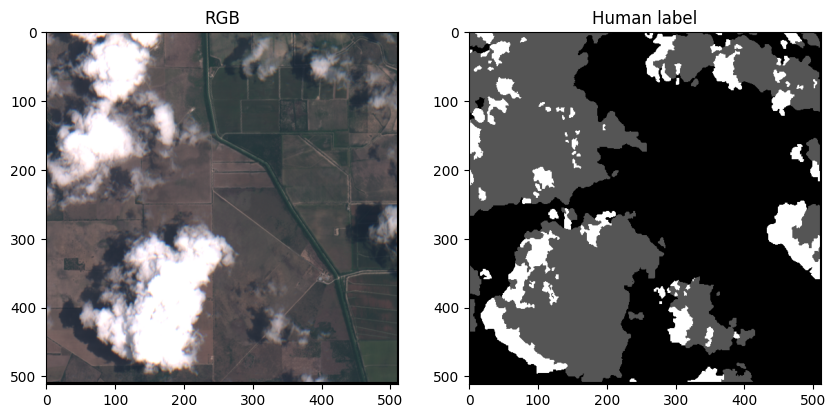

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datapoint = datacube[0]

datapoint_rgb = np.moveaxis(datapoint[[3, 2, 1]], 0, -1) / 5_000
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(datapoint_rgb)
ax[0].set_title("RGB")
ax[1].imshow(datapoint[13], cmap="gray")
ax[1].set_title("Human label")

In [ ]:
datapoint[14].shape

(512, 512)

### Cloud mask plot comparison

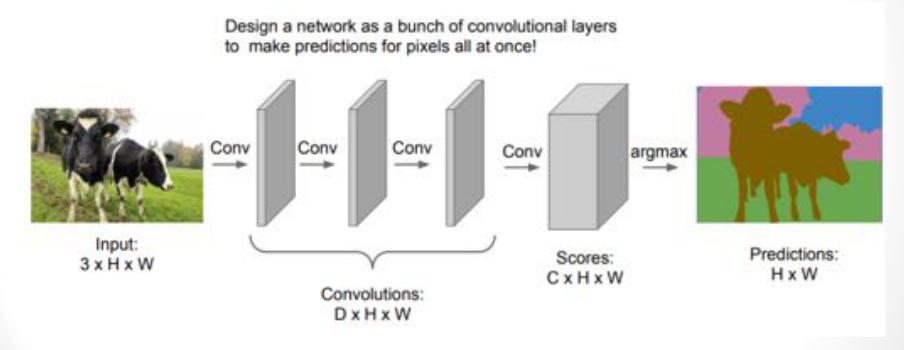

#### Plot Functions

In [ ]:
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import s2cloudless


s2cloudless_cprob = s2cloudless.S2PixelCloudDetector()

COLORS_CLOUDSEN12 = np.array(
    [[0, 0, 0], # clear
    [220, 220, 220], # Thick cloud
    [180, 180, 180], # Thin cloud
    [60, 60, 60]], # cloud shadow
    dtype=np.float32
) / 255
INTERPRETATION_CLOUDSEN12 = ["clear", "Thick cloud", "Thin cloud", "Cloud shadow"]

In [ ]:
def plot_segmentation_mask(mask, color_array, interpretation_array=None,legend:bool=True, ax=None):
    cmap_categorical = colors.ListedColormap(color_array)

    norm_categorical = colors.Normalize(vmin=-.5,
                                        vmax=color_array.shape[0]-.5)

    color_array = np.array(color_array)
    if interpretation_array is not None:
        assert len(interpretation_array) == color_array.shape[0], f"Different numbers of colors and interpretation {len(interpretation_array)} {color_array.shape[0]}"


    if ax is None:
        ax = plt.gca()

    ax.imshow(mask, cmap=cmap_categorical, norm=norm_categorical,interpolation='nearest')
    if legend:
        patches = []
        for c, interp in zip(color_array, interpretation_array):
            patches.append(mpatches.Patch(color=c, label=interp))

        ax.legend(handles=patches, fontsize="25", loc='upper right')
    return ax

In [ ]:
def plot_cloudmask(mask, legend:bool=True, ax=None):
    return plot_segmentation_mask(mask=mask,color_array=COLORS_CLOUDSEN12,interpretation_array=INTERPRETATION_CLOUDSEN12,legend=legend,ax=ax)

#### Comparison Function

In [ ]:
def compare_all_models(s2np, manuallynp, sen2cornp, s2cloudlessnp, kappamasknp, fmasknp, unetmobv2_cloudmask, qa60, s1):

    # Load Sen2Cor results
    # from 11 classes to 4 classes
    thick_cloud = (sen2cornp  == 9) | (sen2cornp  == 8)
    thin_cloud = (sen2cornp  == 10)
    cloud_shadow = (sen2cornp  == 3)
    clear = (
        (sen2cornp  == 1) | (sen2cornp  == 2) | (sen2cornp  == 4) |
        (sen2cornp  == 5) | (sen2cornp  == 6) | (sen2cornp  == 7) |
        (sen2cornp  == 11)
    )


    # apply argmax
    sen2cor_cloudmask = np.concatenate(
        [clear, thick_cloud, thin_cloud, cloud_shadow],
        axis=0
    ).argmax(axis=0)


    # Load s2cloudless results
    s2cloudlessnp = s2cloudlessnp/100
    s2cloudless_cloudmask = s2cloudless_cprob.get_mask_from_prob(s2cloudlessnp).squeeze()

    # Load kappamask_L1C results
    clear = kappamasknp == 1
    thick_cloud = kappamasknp == 4
    thin_cloud = kappamasknp == 3
    cloud_shadow = kappamasknp == 2

    # apply argmax
    kappamask_cloudmask = np.concatenate(
        [clear, thick_cloud, thin_cloud, cloud_shadow],
        axis=0
    ).argmax(axis=0)

    # Load Fmask results
    clear = (fmasknp == 0) | (fmasknp == 1) | (fmasknp == 3)
    thick_cloud = fmasknp == 4
    thin_cloud = fmasknp*0
    cloud_shadow = fmasknp == 2

    # apply argmax
    fmask_cloudmask = np.concatenate(
        [clear, thick_cloud, thick_cloud, cloud_shadow],
        axis=0
    ).argmax(axis=0)

    # Display all the bands
    fig, ax = plt.subplots(3, 3, figsize=(40, 30), tight_layout=False)

    # Plot RGB
    ax[0,0].imshow(s2np)
    ax[0,0].set_title("S2 RGB", fontsize=40)

    # Plot Manually labeled data
    plot_cloudmask(manuallynp, ax=ax[0, 1], legend=False)
    ax[0, 1].set_title("Human Labeled", fontsize=40)


    plot_cloudmask(sen2cor_cloudmask, ax=ax[0, 2], legend=False)
    ax[0, 2].set_title("Sen2Cor", fontsize=40)


    plot_cloudmask(s2cloudless_cloudmask, ax=ax[1, 0], legend=False)
    ax[1, 0].set_title("s2cloudless", fontsize=40)


    plot_cloudmask(kappamask_cloudmask, ax=ax[1, 1], legend=False)
    ax[1, 1].set_title("KappaMask L1C", fontsize=40)


    plot_cloudmask(fmask_cloudmask, ax=ax[1, 2], legend=False)
    ax[1, 2].set_title("Fmask", fontsize=40)

    plot_cloudmask(unetmobv2_cloudmask, ax=ax[2, 0], legend=False)
    ax[2, 0].set_title("UnetMobv2", fontsize=40)

    plot_cloudmask(qa60, ax=ax[2, 1], legend=True)
    ax[2, 1].set_title("QA60", fontsize=40)

    A=np.abs(s1[0])
    Am=np.mean(A)
    As=np.std(np.abs(A))
    ax[2,2].imshow(np.abs(A),cmap='gray',vmin=0,vmax=Am+As)
    ax[2,2].set_title("SAR", fontsize=40)

    return sen2cor_cloudmask, s2cloudless_cloudmask, kappamask_cloudmask, fmask_cloudmask


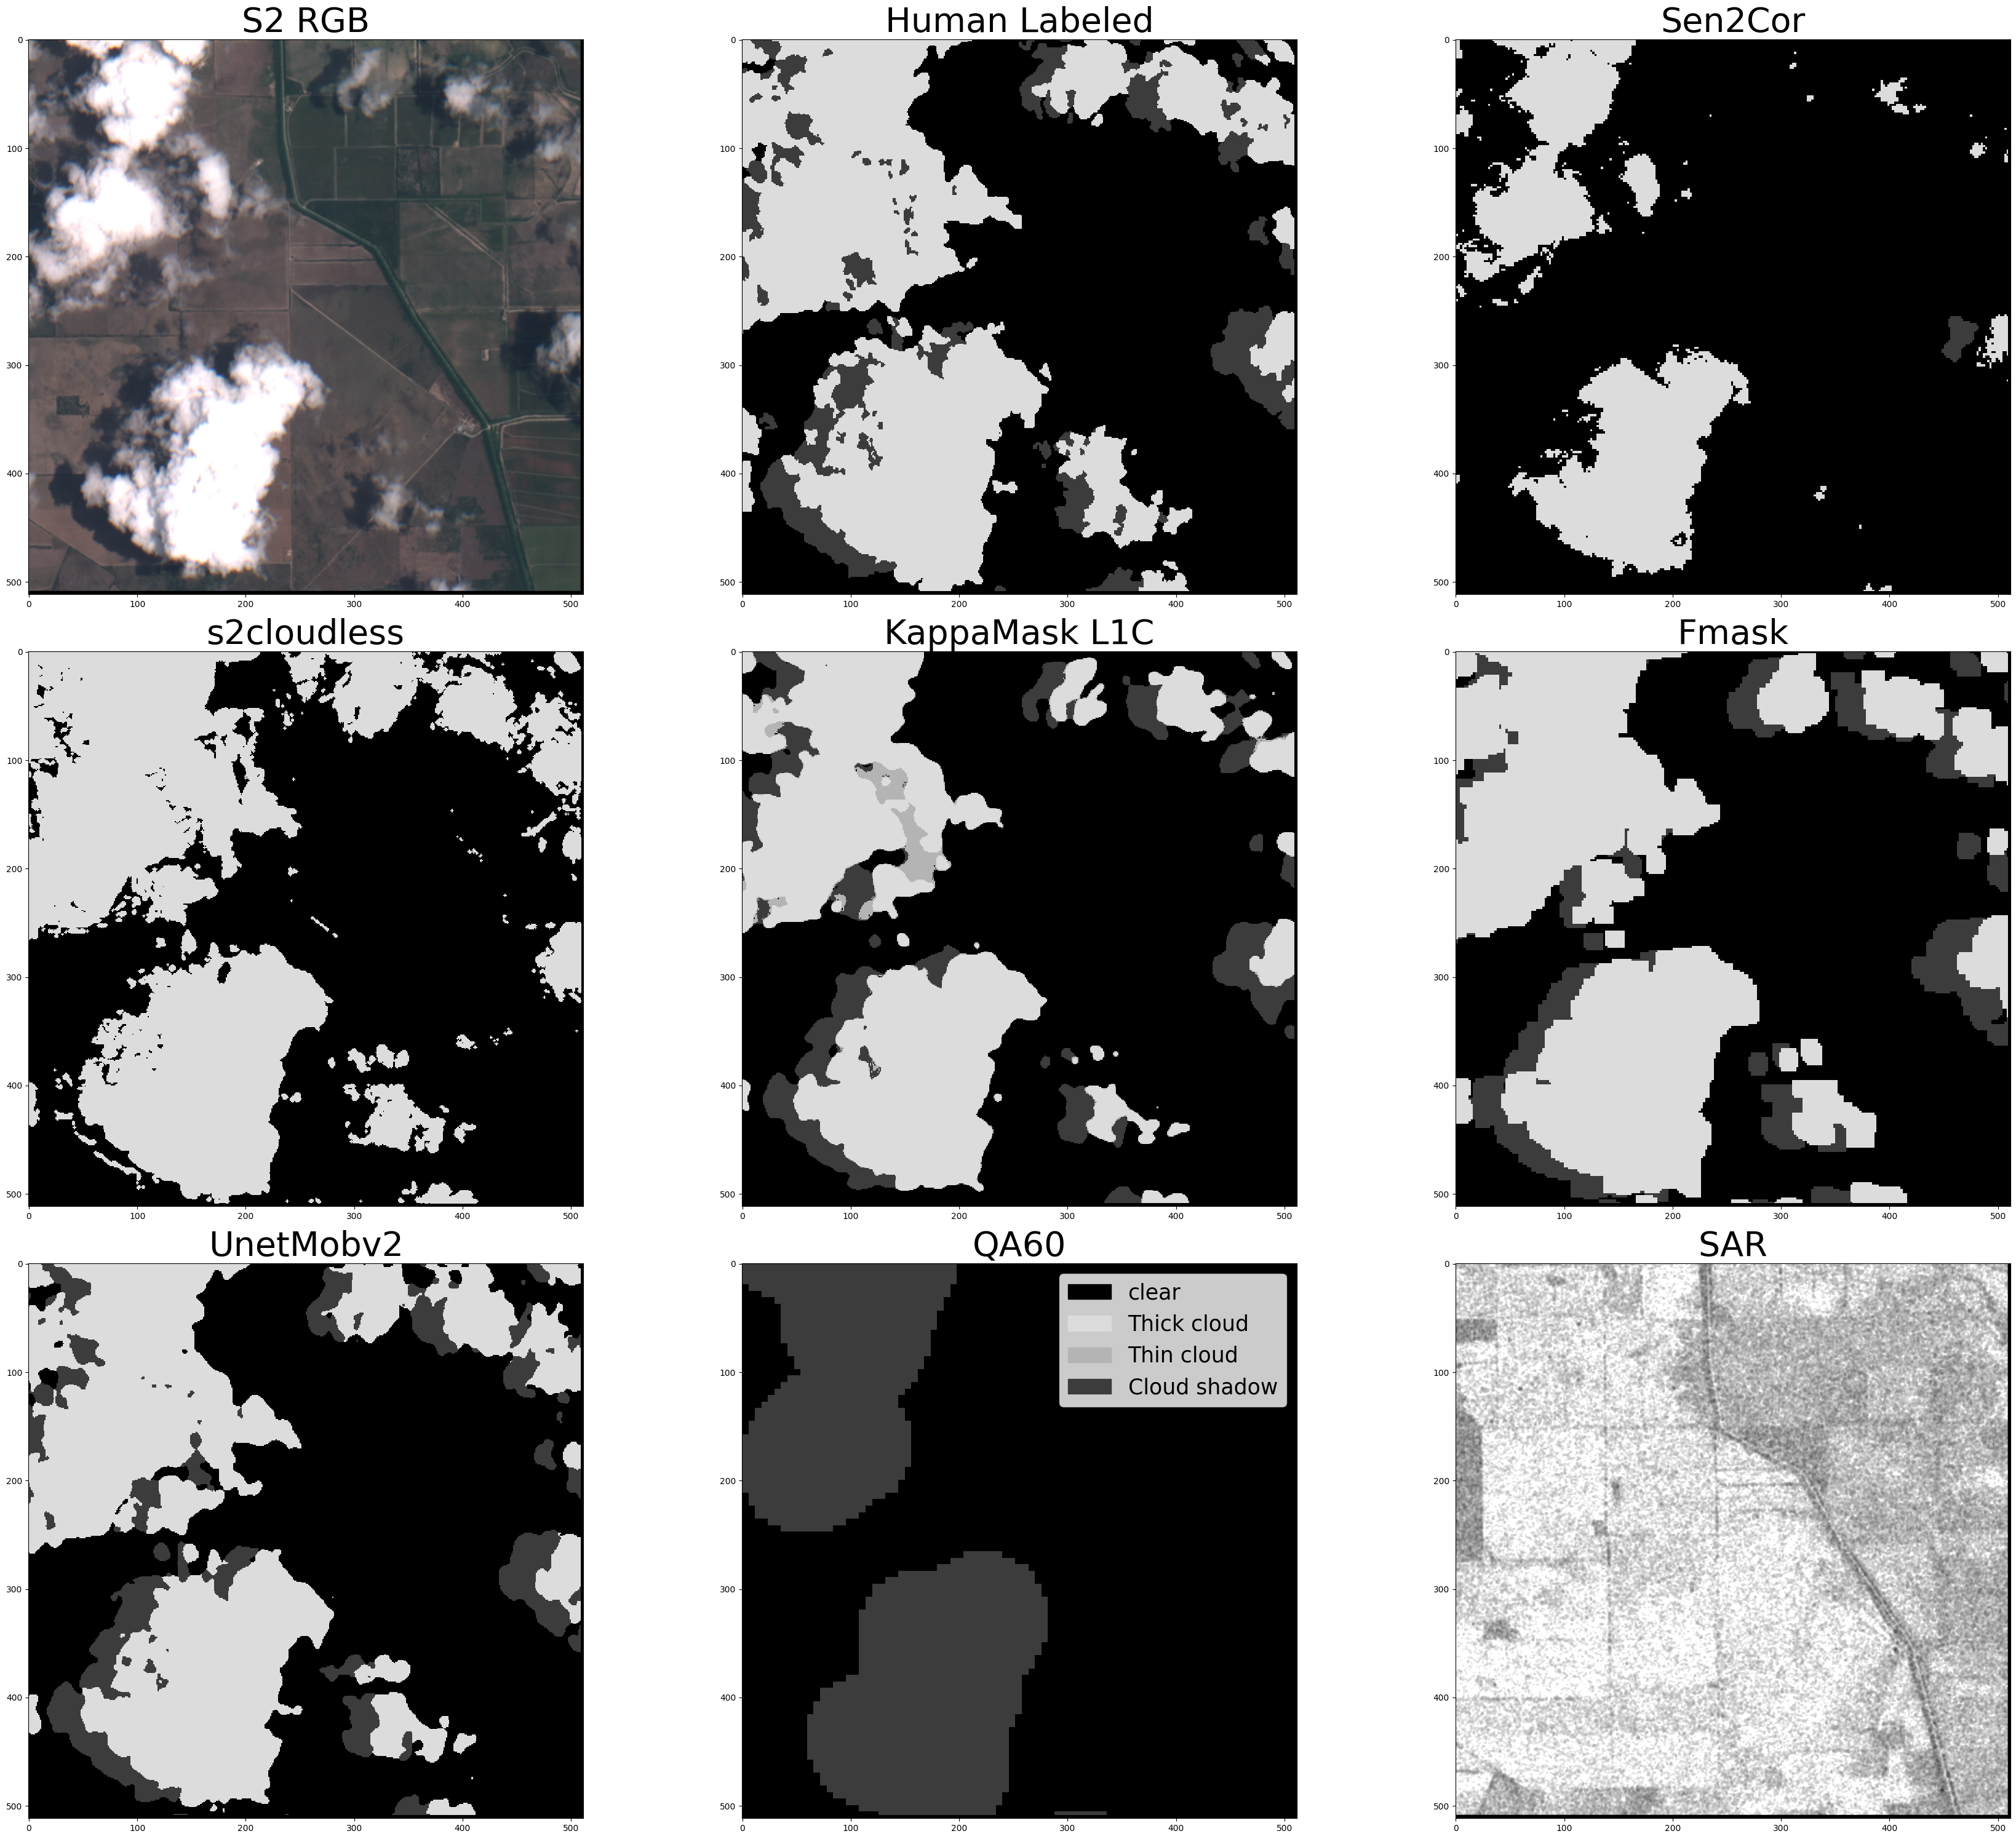

In [ ]:
sen2cor_cloudmask, s2cloudless_cloudmask, kappamask_cloudmask, fmask_cloudmask  = compare_all_models(
    manuallynp=datapoint[13],
    s2np=s2l1c,
    sen2cornp=sen2cor,
    s2cloudlessnp=s2cloudless_np,
    kappamasknp=kappamask_L1C,
    fmasknp=fmask,
    unetmobv2_cloudmask=datapoint[14],
    qa60=qa60[0],
    s1=s1
)

# Accuracy

In [ ]:
import numpy as np

manually_cloudmask = np.reshape(datapoint[13], (1, 512, 512))

In [ ]:
import cv2
import numpy as np


def absolute_difference(img1, img2):

    img1 = img1.astype(np.uint8)
    img2 = img2.astype(np.uint8)

    #--- take the absolute difference of the images ---
    res = cv2.absdiff(img1, img2)

    #--- convert the result to integer type ---
    res = res.astype(np.uint8)

    #--- find percentage difference based on the number of pixels that are not zero ---
    percentage = 100 - ((np.count_nonzero(res) * 100)/ res.size)

    return round(percentage, 2)

In [ ]:
sen2cor_acc = absolute_difference(manually_cloudmask[0], sen2cor_cloudmask)
fmask_acc = absolute_difference(manually_cloudmask[0], fmask_cloudmask)
s2cloudless_acc = absolute_difference(manually_cloudmask[0], s2cloudless_cloudmask)
kappamask_acc = absolute_difference(manually_cloudmask[0], kappamask_cloudmask)
unetmob_acc = absolute_difference(manually_cloudmask[0], datapoint[14])

In [ ]:
import pandas as pd

data = {
    'Model': ['sen2cor', 'fmask', 's2cloudless', 'kappa_mask', 'unetmob'],
    'Accuracy': [sen2cor_acc, fmask_acc, s2cloudless_acc, kappamask_acc, unetmob_acc]
}

# Create the DataFrame
df = pd.DataFrame(data)

df

,Model,Accuracy
0,sen2cor,70.64
1,fmask,87.36
2,s2cloudless,83.06
3,kappa_mask,87.90
4,unetmob,93.32


In [ ]:
acc_dict = {}
# Find pixels with the current value in image1
mask = (s2cloudless_cloudmask == 1)

# Calculate the number of matching pixels with the same value in both images
matching_pixels = np.sum(mask & (manually_cloudmask[0] == 1))

# Total number of pixels with the current value in image1
total_pixels = np.sum(mask)

# Calculate accuracy as a percentage
accuracy = (matching_pixels / total_pixels * 100)

# Store the accuracy in the dictionary
acc_dict[1] = round(accuracy, 2)
acc_dict

{1: 81.34}

In [ ]:
np.unique(s2cloudless_cloudmask)

array([0, 1], dtype=uint8)

In [ ]:
def semantic_difference(img1, img2):

    img1_unique = np.unique(img1)
    img2_unique = np.unique(img2)

    accuracy_dict = {}
    # Calculate accuracy for each pixel value (0, 1, 2, 3)
    for value in range(4):
        # Find pixels with the current value in image1
        mask = (img1 == value)

        # Calculate the number of matching pixels with the same value in both images
        matching_pixels = np.sum(mask & (img2 == value))

        # Total number of pixels with the current value in image1
        total_pixels = np.sum(mask)

        # Calculate accuracy as a percentage
        accuracy = (matching_pixels / total_pixels * 100) if total_pixels > 0 else 0

        # Store the accuracy in the dictionary
        accuracy_dict[value] = round(accuracy, 2)

    return accuracy_dict

In [ ]:
sen2cor_pixel_accuracy = semantic_difference(manually_cloudmask[0], sen2cor_cloudmask)
fmask_pixel_accuracy = semantic_difference(manually_cloudmask[0], fmask_cloudmask)
kappamask_pixel_accuracy = semantic_difference(manually_cloudmask[0], kappamask_cloudmask)
s2cloudless_pixel_accuracy = semantic_difference(manually_cloudmask[0], s2cloudless_cloudmask)
unetmob_pixel_accuracy = semantic_difference(manually_cloudmask[0], datapoint[14])

sen2cor_pixel_accuracy = {
    "Model": "sen2cor",
    "Clear": sen2cor_pixel_accuracy[0],
    "Thick Cloud": sen2cor_pixel_accuracy[1],
    "Thin Cloud": sen2cor_pixel_accuracy[2],
    "Cloud Shadow": sen2cor_pixel_accuracy[3],
    "Absolute": sen2cor_acc
}

fmask_pixel_accuracy = {
    "Model": "fmask",
    "Clear": fmask_pixel_accuracy[0],
    "Thick Cloud": fmask_pixel_accuracy[1],
    "Thin Cloud": fmask_pixel_accuracy[2],
    "Cloud Shadow": fmask_pixel_accuracy[3],
    "Absolute": fmask_acc
}

s2cloudless_pixel_accuracy = {
    "Model": "s2cloudless",
    "Clear": s2cloudless_pixel_accuracy[0],
    "Thick Cloud": s2cloudless_pixel_accuracy[1],
    "Thin Cloud": s2cloudless_pixel_accuracy[2],
    "Cloud Shadow": s2cloudless_pixel_accuracy[3],
    "Absolute": s2cloudless_acc
}

kappamask_pixel_accuracy = {
    "Model": "kappamask",
    "Clear": kappamask_pixel_accuracy[0],
    "Thick Cloud": kappamask_pixel_accuracy[1],
    "Thin Cloud": kappamask_pixel_accuracy[2],
    "Cloud Shadow": kappamask_pixel_accuracy[3],
    "Absolute": kappamask_acc
}

unetmob_pixel_accuracy = {
    "Model": "unetmob",
    "Clear": unetmob_pixel_accuracy[0],
    "Thick Cloud": unetmob_pixel_accuracy[1],
    "Thin Cloud": unetmob_pixel_accuracy[2],
    "Cloud Shadow": unetmob_pixel_accuracy[3],
    "Absolute": unetmob_acc
}

In [ ]:
dict_list = [sen2cor_pixel_accuracy, fmask_pixel_accuracy, kappamask_pixel_accuracy, s2cloudless_pixel_accuracy, unetmob_pixel_accuracy]

# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(dict_list).T

# Display the DataFrame
df

,0,1,2,3,4
Model,sen2cor,fmask,kappamask,s2cloudless,unetmob
Clear,99.99,92.43,99.71,94.16,97.78
Thick Cloud,45.49,86.97,74.05,88.36,88.91
Thin Cloud,0,0,0,0,0
Cloud Shadow,3.17,60.38,75.2,0.0,85.33
Absolute,70.64,87.36,87.9,83.06,93.32
